**ONLY LOOK AT THE LAST CELL**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
file_path = "/content/fredupdated.csv"
df = pd.read_csv(file_path)

# Convert observation_date to datetime format
df['observation_date'] = pd.to_datetime(df['observation_date'])
df = df.sort_values(by='observation_date')

# Compute Inflation Rate (Year-over-Year Percentage Change in CPI)
df['Inflation_Rate'] = (df['CPIAUCSL'].pct_change(periods=12)) * 100

# Filter data from 1948 onwards (since unemployment data starts reliably from then)
df_filtered = df[df['observation_date'] >= '1948-01-01']

# Drop NaN values for regression models
df_model = df_filtered[['Inflation_Rate', 'UNRATE']].dropna()

# Splitting Data into Training and Testing Sets
X = df_model[['UNRATE']]  # Unemployment Rate (Predictor)
y = df_model['Inflation_Rate']  # Inflation Rate (Target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

<ipython-input-7-3a46f56c7c0f>:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Inflation_Rate'] = (df['CPIAUCSL'].pct_change(periods=12)) * 100


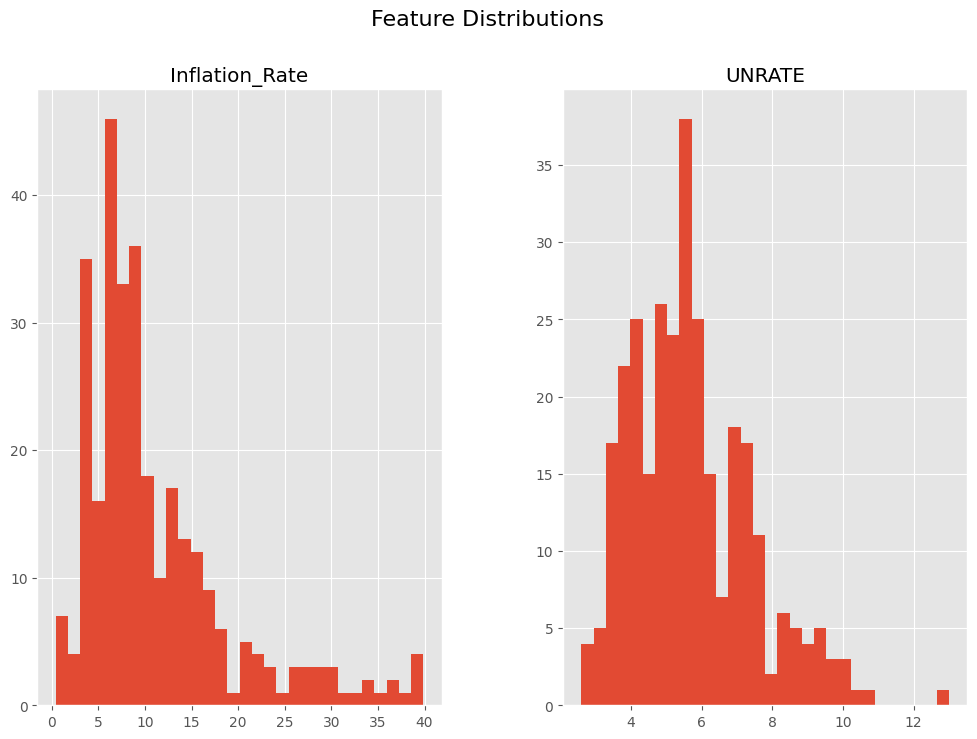

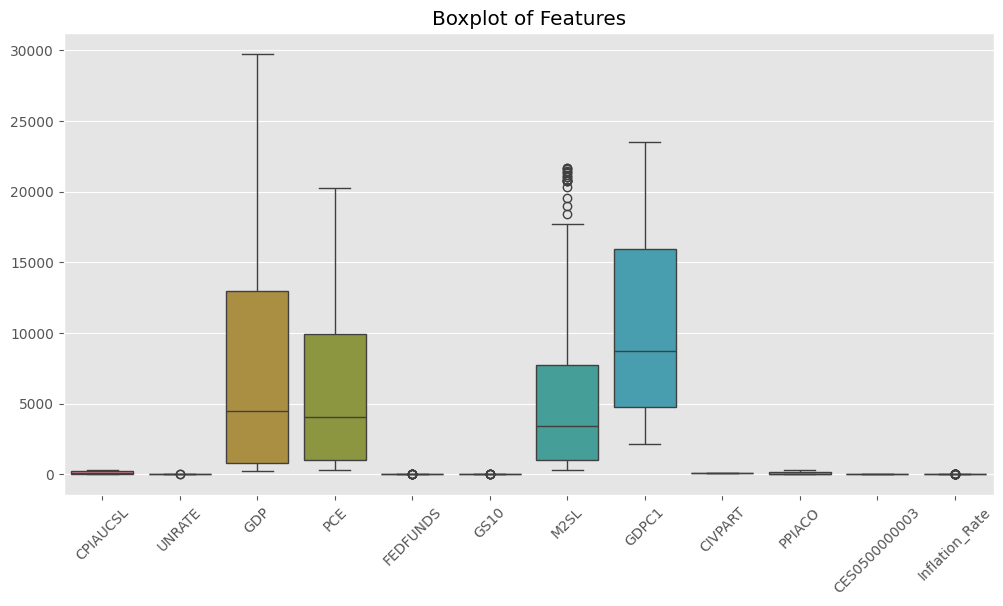

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller # Histograms
df_model.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features")
plt.show()

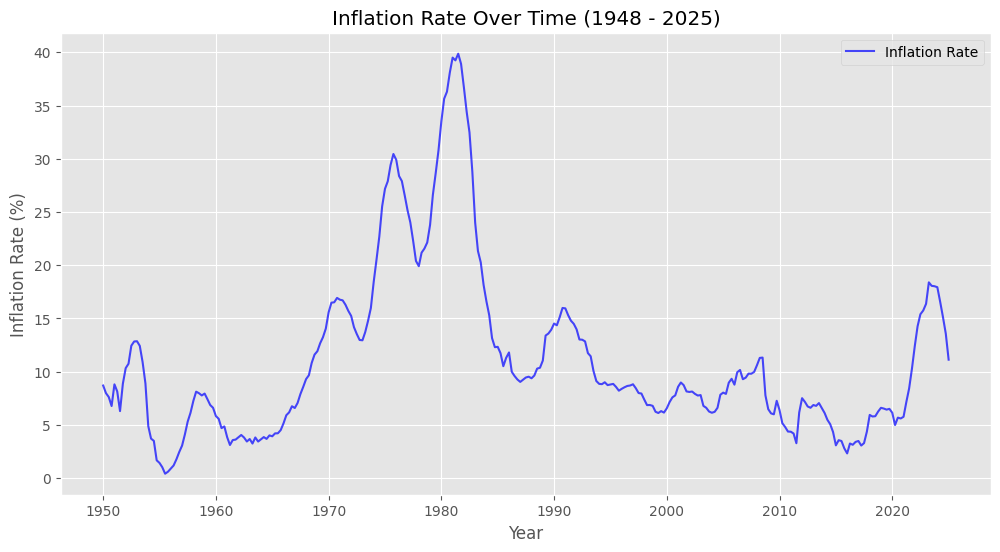

<ipython-input-14-ceb24984c974>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Rolling_Inflation'] = df_filtered['Inflation_Rate'].rolling(window=120, min_periods=1).mean()


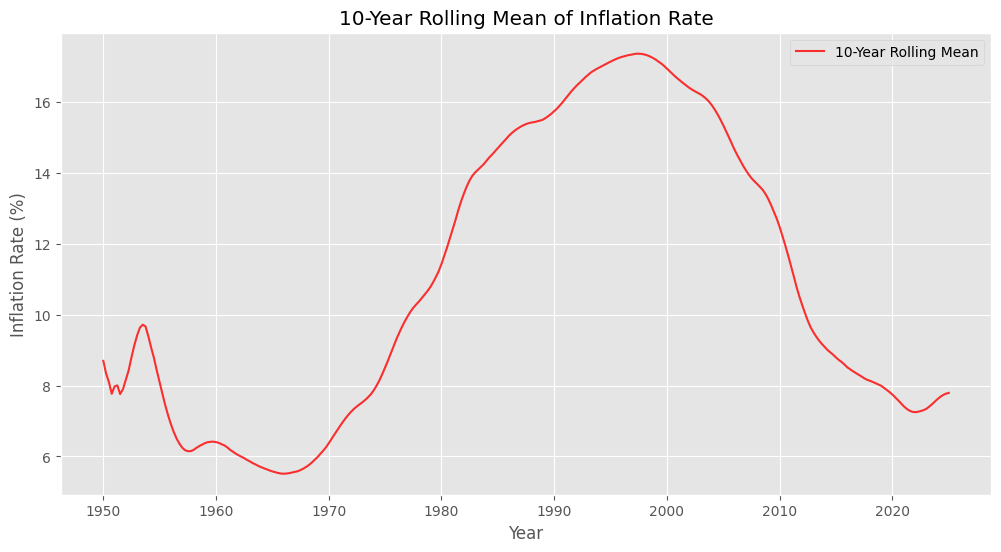

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['observation_date'], df_filtered['Inflation_Rate'], label='Inflation Rate', color='blue', alpha=0.7)
plt.title("Inflation Rate Over Time (1948 - 2025)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# Compute Rolling Mean (10-Year Window)
df_filtered['Rolling_Inflation'] = df_filtered['Inflation_Rate'].rolling(window=120, min_periods=1).mean()

# Plot Rolling Mean of Inflation Rate
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['observation_date'], df_filtered['Rolling_Inflation'], label='10-Year Rolling Mean', color='red', alpha=0.8)
plt.title("10-Year Rolling Mean of Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

Linear Regression RMSE: 10.318675717011189


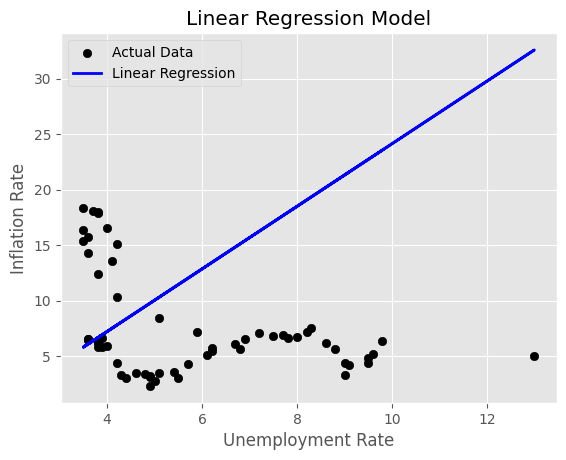

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
# Compute RMSE for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f"Linear Regression RMSE: {rmse_linear}")

plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred_linear, color='blue', linewidth=2, label='Linear Regression')
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Ridge Regression RMSE: 10.30988013290914
Lasso Regression RMSE: 10.24378425384505


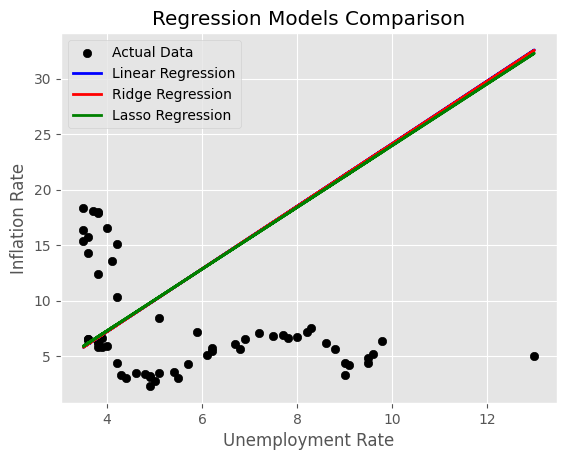

In [ ]:
# ---- 2. Ridge and Lasso Regression ----
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Lasso Regression RMSE: {rmse_lasso}")

plt.scatter(X_test, y_test, color='black', label='Actual Data')
plt.plot(X_test, y_pred_linear, color='blue', linewidth=2, label='Linear Regression')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=2, label='Ridge Regression')
plt.plot(X_test, y_pred_lasso, color='green', linewidth=2, label='Lasso Regression')
plt.xlabel('Unemployment Rate')
plt.ylabel('Inflation Rate')
plt.title('Regression Models Comparison')
plt.legend()
plt.show()

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


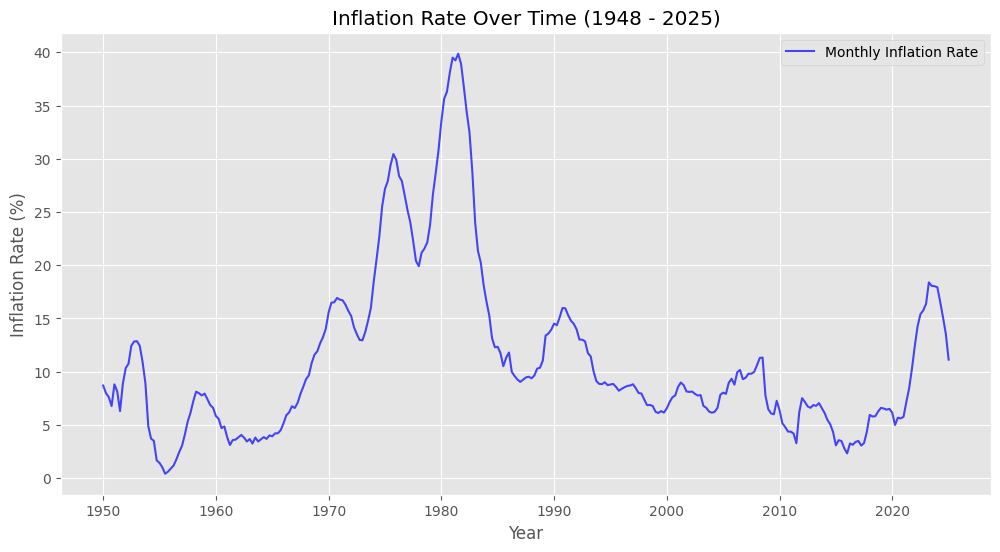

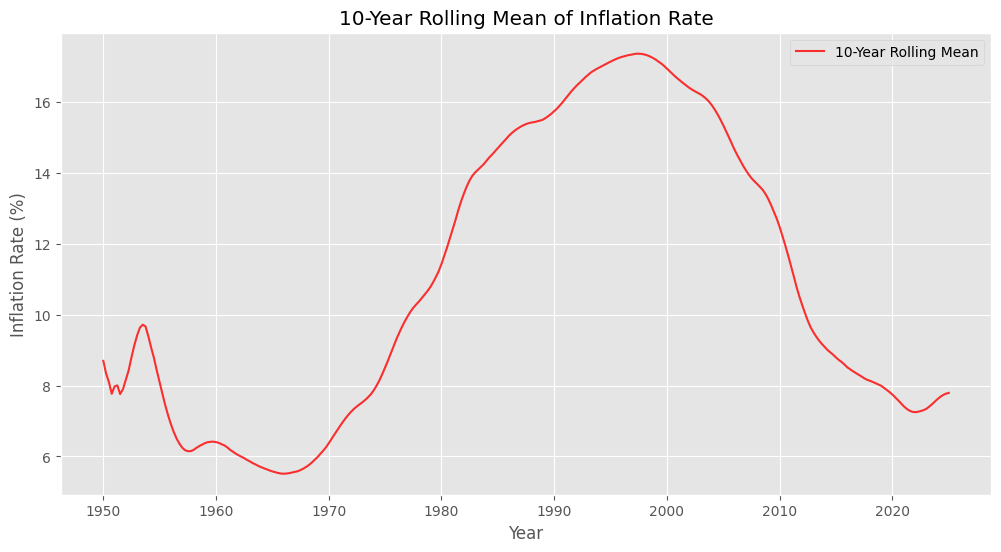

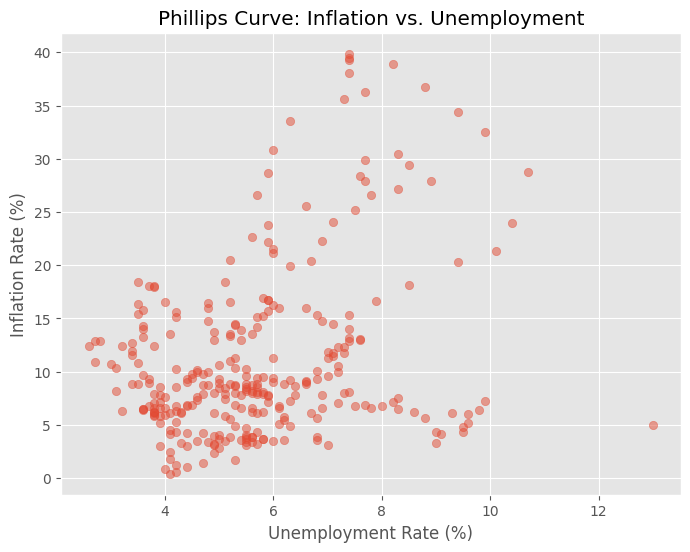

Linear Regression Model:
Coefficient: 1.5460143559073405
Intercept: 2.252230152108053
R2 Score: 0.10894488527460267


OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     36.43
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           4.68e-09
Time:                        22:31:31   Log-Likelihood:                -1031.5
No. Observations:                 300   AIC:                             2067.
Df Residuals:                     298   BIC:                             2074.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

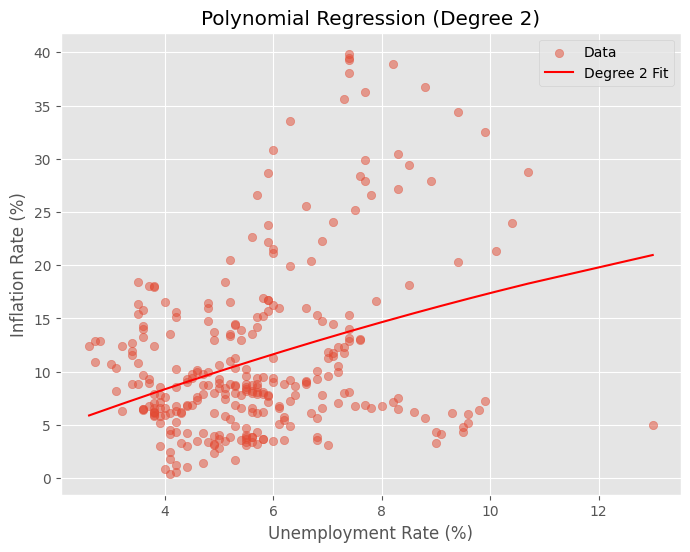

ARIMA(1,1,1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:         Inflation_Rate   No. Observations:                  301
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -367.049
Date:                Sun, 09 Mar 2025   AIC                            740.098
Time:                        22:31:32   BIC                            751.209
Sample:                    01-01-1950   HQIC                           744.545
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8032      0.047     17.044      0.000       0.711       0.896
ma.L1         -0.3011      0.073     -4.138      0.000      -0.444      -0.158
sigma2         0.6751   

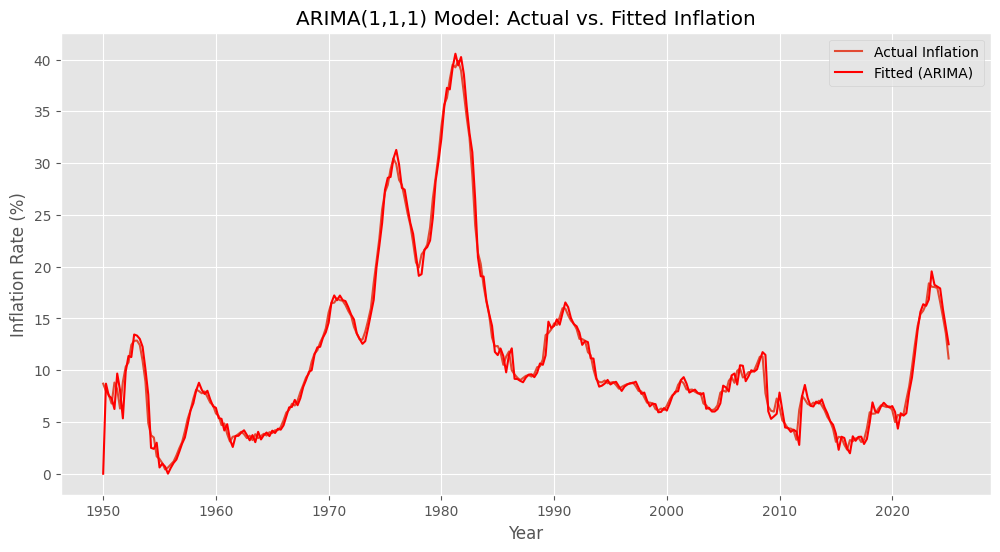

Random Forest Model:
R2 Score: 0.4363266803087279
MSE: 35.91113940789467


k-Nearest Neighbors (k=5) Model:
R2 Score: 0.34118742644990296
MSE: 41.972378939967285


Generalized Additive Model (GAM):
R2 Score: 0.2459588956301949




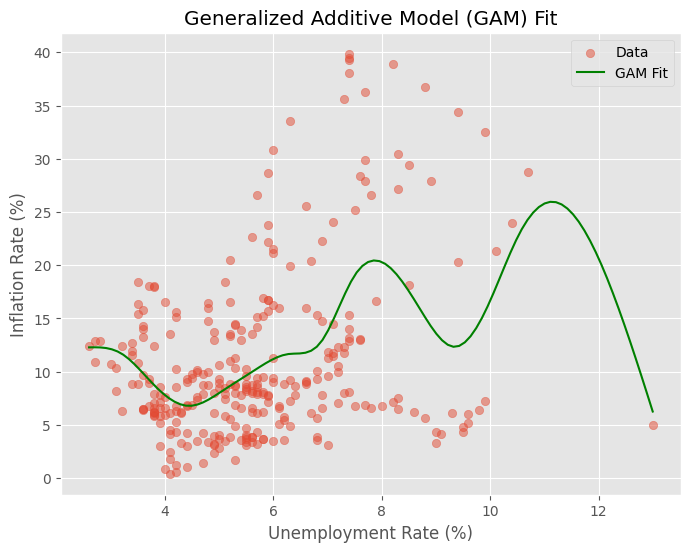

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For statistical models and time series analysis
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# For machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# For GAM (if not installed, uncomment the following line to install via pip)
!pip install pygam
from pygam import LinearGAM, s

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
# Load the dataset (update the file path as needed)
file_path = "/content/fredupdated.csv"
df = pd.read_csv(file_path)

# Convert observation_date to datetime and sort the DataFrame
df['observation_date'] = pd.to_datetime(df['observation_date'])
df = df.sort_values(by='observation_date')

# Compute Inflation Rate as the year-over-year percentage change in CPIAUCSL
df['Inflation_Rate'] = df['CPIAUCSL'].pct_change(periods=12) * 100

# Filter data from 1948 onward (since unemployment data is more reliable from that period)
df = df[df['observation_date'] >= '1948-01-01'].reset_index(drop=True)

# Drop rows where Inflation_Rate or UNRATE are missing
df_model = df.dropna(subset=['Inflation_Rate', 'UNRATE']).copy()

# ---------------------------
# 2. Visualizations
# ---------------------------
# Plot the monthly Inflation Rate over time
plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'], df['Inflation_Rate'], label='Monthly Inflation Rate', color='blue', alpha=0.7)
plt.title("Inflation Rate Over Time (1948 - 2025)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# Compute and plot the 10-year (120 months) rolling mean of Inflation Rate
df['Rolling_Inflation'] = df['Inflation_Rate'].rolling(window=120, min_periods=1).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'], df['Rolling_Inflation'], label='10-Year Rolling Mean', color='red', alpha=0.8)
plt.title("10-Year Rolling Mean of Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot to visualize the Phillips Curve relationship (Unemployment vs. Inflation)
plt.figure(figsize=(8, 6))
plt.scatter(df_model['UNRATE'], df_model['Inflation_Rate'], alpha=0.5)
plt.title("Phillips Curve: Inflation vs. Unemployment")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)
plt.show()

# ---------------------------
# 3. Regression Models for Inflation Analysis
# ---------------------------
# Prepare predictor (X) and response (y) variables using UNRATE and Inflation_Rate
X = df_model[['UNRATE']].values  # Predictor: Unemployment Rate
y = df_model['Inflation_Rate'].values  # Response: Inflation Rate

# Split data into training and testing sets (here, we use the entire dataset for demonstration)
# In practice, you may want to use a time-series split.
# ---------------------------
# Model 1: Linear Regression (Ordinary Least Squares)
# ---------------------------
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)
print("Linear Regression Model:")
print("Coefficient:", lin_reg.coef_[0])
print("Intercept:", lin_reg.intercept_)
print("R2 Score:", r2_score(y, y_pred_lin))
print("\n")

# Alternatively, using statsmodels for a detailed summary:
X_sm = sm.add_constant(X)  # adds a constant term to the predictor
ols_model = sm.OLS(y, X_sm).fit()
print("OLS Regression Summary:")
print(ols_model.summary())
print("\n")

# ---------------------------
# Model 2: Regularized Regression (Ridge and Lasso)
# ---------------------------
# Standardize the predictor
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_scaled, y)
y_pred_ridge = ridge_reg.predict(X_scaled)
print("Ridge Regression Model:")
print("Coefficient:", ridge_reg.coef_[0])
print("Intercept:", ridge_reg.intercept_)
print("R2 Score:", r2_score(y, y_pred_ridge))
print("\n")

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_scaled, y)
y_pred_lasso = lasso_reg.predict(X_scaled)
print("Lasso Regression Model:")
print("Coefficient:", lasso_reg.coef_[0])
print("Intercept:", lasso_reg.intercept_)
print("R2 Score:", r2_score(y, y_pred_lasso))
print("\n")

# ---------------------------
# Model 3: Polynomial Regression (Degree 2)
# ---------------------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
print("Polynomial Regression (Degree 2) Model:")
print("Coefficients:", poly_reg.coef_)
print("Intercept:", poly_reg.intercept_)
print("R2 Score:", r2_score(y, y_pred_poly))
print("\n")

# Plotting the polynomial fit along with actual data
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5, label="Data")
# Sort X for smooth curve
sorted_idx = X[:,0].argsort()
plt.plot(X[sorted_idx], y_pred_poly[sorted_idx], color='red', label="Degree 2 Fit")
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Model 4: ARIMA Model for Inflation Time Series
# ---------------------------
# For ARIMA, we use the full inflation time series (monthly data)
# We will select an ARIMA(1,1,1) model for demonstration (in practice, use AIC/BIC to choose order)
inflation_ts = df.set_index('observation_date')['Inflation_Rate'].dropna()
arima_model = ARIMA(inflation_ts, order=(1, 1, 1))
arima_result = arima_model.fit()
print("ARIMA(1,1,1) Model Summary:")
print(arima_result.summary())
print("\n")

# Plot the ARIMA model's fitted values vs. actual inflation rate
plt.figure(figsize=(12, 6))
plt.plot(inflation_ts.index, inflation_ts, label="Actual Inflation")
plt.plot(inflation_ts.index, arima_result.fittedvalues, color='red', label="Fitted (ARIMA)")
plt.title("ARIMA(1,1,1) Model: Actual vs. Fitted Inflation")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Model 5: Random Forest Regression
# ---------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
y_pred_rf = rf_model.predict(X)
print("Random Forest Model:")
print("R2 Score:", r2_score(y, y_pred_rf))
print("MSE:", mean_squared_error(y, y_pred_rf))
print("\n")

# ---------------------------
# Model 6: k-Nearest Neighbors Regression
# ---------------------------
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
y_pred_knn = knn_model.predict(X)
print("k-Nearest Neighbors (k=5) Model:")
print("R2 Score:", r2_score(y, y_pred_knn))
print("MSE:", mean_squared_error(y, y_pred_knn))
print("\n")

# ---------------------------
# Model 7: Generalized Additive Model (GAM)
# ---------------------------
# Using pygam to allow a flexible, non-parametric fit for the relationship
gam = LinearGAM(s(0)).fit(X, y)
y_pred_gam = gam.predict(X)
print("Generalized Additive Model (GAM):")
print("R2 Score:", r2_score(y, y_pred_gam))
print("\n")

# Plot GAM fit
plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.5, label="Data")
XX = np.linspace(X.min(), X.max(), 100)
plt.plot(XX, gam.predict(XX), color='green', label="GAM Fit")
plt.title("Generalized Additive Model (GAM) Fit")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

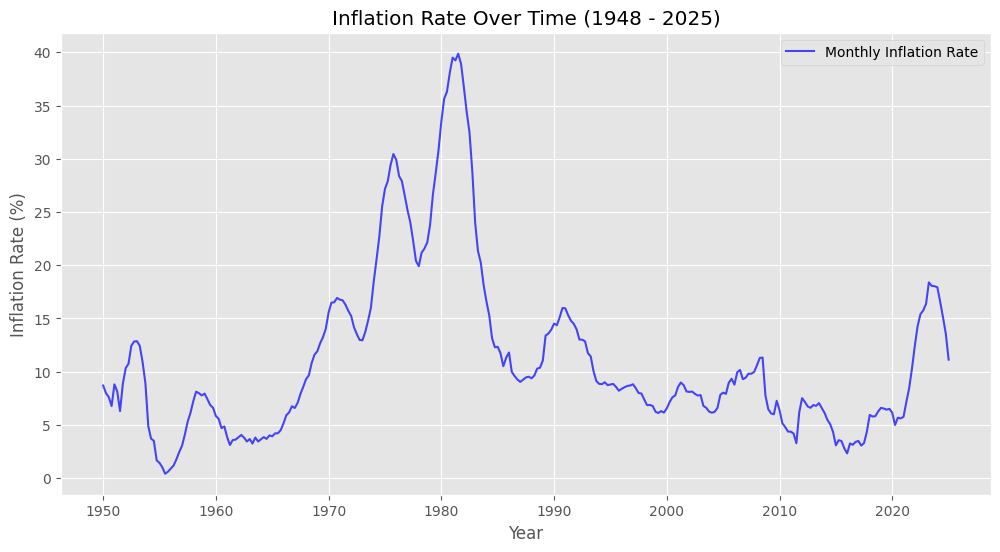

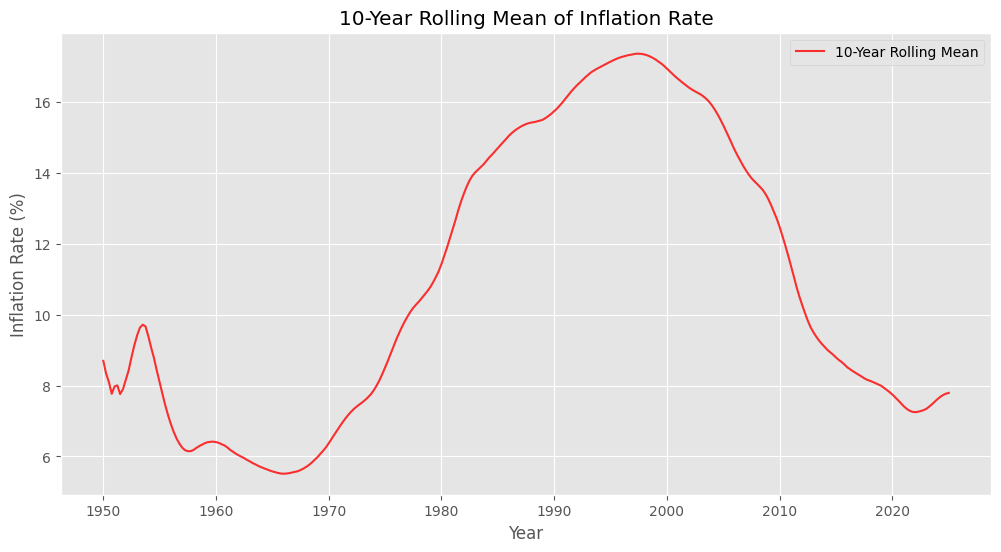

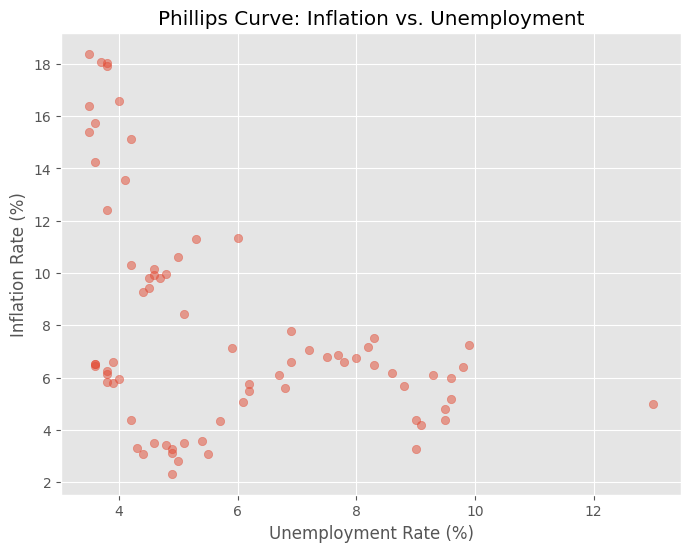

Multivariate OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     141.9
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           1.04e-39
Time:                        22:39:12   Log-Likelihood:                -96.320
No. Observations:                  75   AIC:                             214.6
Df Residuals:                      64   BIC:                             240.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -10

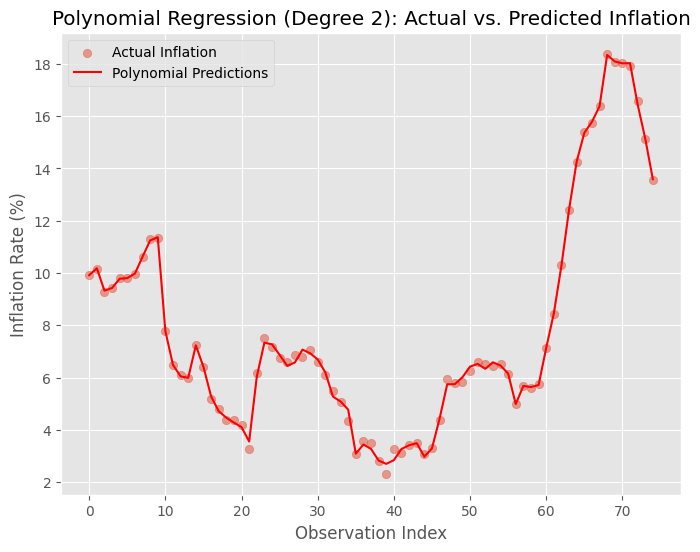

ARIMA(1,1,1) Model Summary:
                               SARIMAX Results                                
Dep. Variable:         Inflation_Rate   No. Observations:                  301
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -367.049
Date:                Sun, 09 Mar 2025   AIC                            740.098
Time:                        22:39:12   BIC                            751.209
Sample:                    01-01-1950   HQIC                           744.545
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8032      0.047     17.044      0.000       0.711       0.896
ma.L1         -0.3011      0.073     -4.138      0.000      -0.444      -0.158
sigma2         0.6751   

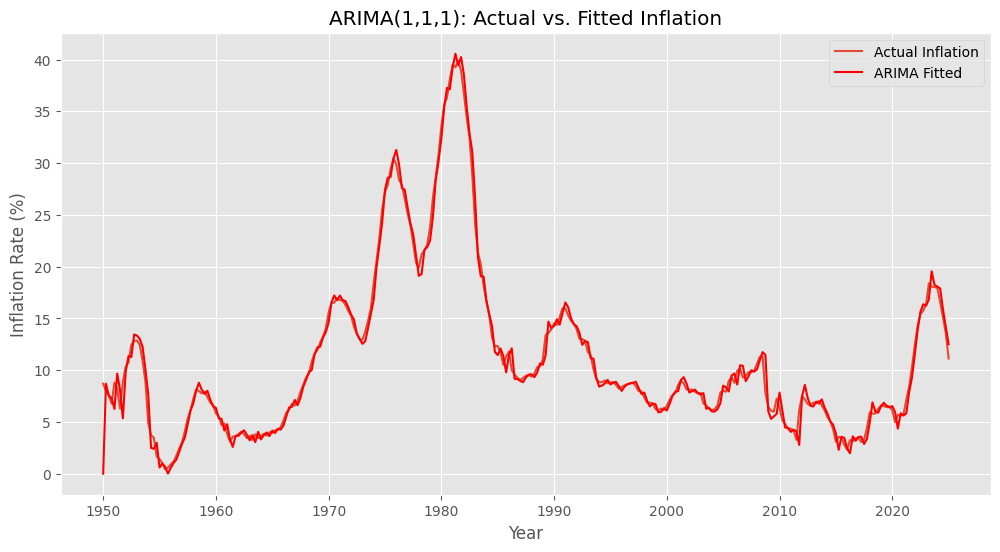

Random Forest Regression:
R2 Score: 0.9944470081643696
MSE: 0.09829333853032579


k-Nearest Neighbors Regression (k=5):
R2 Score: 0.9758220627030325
MSE: 0.4279729281154303


Generalized Additive Model (GAM):
R2 Score: 0.9691837451090727
MSE: 0.545477584676993
Generalized Additive Model (GAM):
R2 Score: 0.9691837451090727
MSE: 0.545477584676993




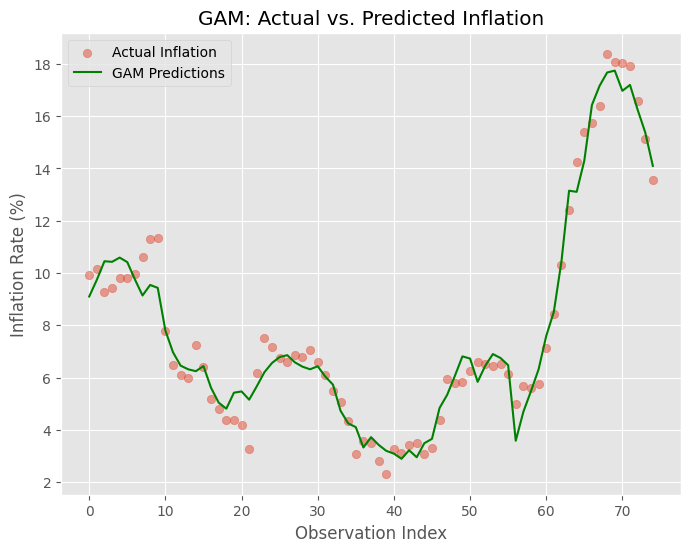

In [18]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Statistical and time series libraries
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Machine learning libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# For GAM modeling (ensure pygam is installed; if not, run: pip install pygam)
from pygam import LinearGAM, s

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
# Load the dataset (update the file path as needed)
file_path = "/content/fredupdated.csv"
df = pd.read_csv(file_path)

# Convert observation_date to datetime and sort the DataFrame
df['observation_date'] = pd.to_datetime(df['observation_date'])
df = df.sort_values(by='observation_date')

# Compute Inflation Rate as the year-over-year percentage change in CPIAUCSL
df['Inflation_Rate'] = df['CPIAUCSL'].pct_change(periods=12) * 100

# Define additional predictor columns available in the dataset
predictor_cols = ['UNRATE', 'GDP', 'PCE', 'FEDFUNDS', 'GS10',
                  'M2SL', 'GDPC1', 'CIVPART', 'PPIACO', 'CES0500000003']

# Filter data from 1948 onward and drop rows missing either Inflation_Rate or any predictor
df = df[df['observation_date'] >= '1948-01-01'].reset_index(drop=True)
df_model = df.dropna(subset=['Inflation_Rate'] + predictor_cols).copy()

# ---------------------------
# 2. Visualizations
# ---------------------------
# Time Series Plot: Monthly Inflation Rate
plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'], df['Inflation_Rate'], label='Monthly Inflation Rate', color='blue', alpha=0.7)
plt.title("Inflation Rate Over Time (1948 - 2025)")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# 10-Year (120 months) Rolling Mean of Inflation Rate
df['Rolling_Inflation'] = df['Inflation_Rate'].rolling(window=120, min_periods=1).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['observation_date'], df['Rolling_Inflation'], label='10-Year Rolling Mean', color='red', alpha=0.8)
plt.title("10-Year Rolling Mean of Inflation Rate")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot: Unemployment vs. Inflation (Phillips Curve)
plt.figure(figsize=(8, 6))
plt.scatter(df_model['UNRATE'], df_model['Inflation_Rate'], alpha=0.5)
plt.title("Phillips Curve: Inflation vs. Unemployment")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)
plt.show()

# ---------------------------
# 3. Regression & Prediction Models Using Multiple Predictors
# ---------------------------
# Prepare the multivariate predictors (X) and response variable (y)
X = df_model[predictor_cols].values   # All additional predictors including UNRATE
y = df_model['Inflation_Rate'].values  # Response: Inflation Rate

# --- Model 1: Multivariate Linear Regression (OLS) ---
X_sm = sm.add_constant(X)  # Add constant term for intercept
ols_model = sm.OLS(y, X_sm).fit()
print("Multivariate OLS Regression Summary:")
print(ols_model.summary())
print("\n")

# --- Model 2: Regularized Regression (Ridge and Lasso) ---
# Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_scaled, y)
y_pred_ridge = ridge_reg.predict(X_scaled)
print("Ridge Regression Model:")
print("Coefficients:", ridge_reg.coef_)
print("Intercept:", ridge_reg.intercept_)
print("R2 Score:", r2_score(y, y_pred_ridge))
print("MSE:", mean_squared_error(y, y_pred_ridge))
print("\n")

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_scaled, y)
y_pred_lasso = lasso_reg.predict(X_scaled)
print("Lasso Regression Model:")
print("Coefficients:", lasso_reg.coef_)
print("Intercept:", lasso_reg.intercept_)
print("R2 Score:", r2_score(y, y_pred_lasso))
print("MSE:", mean_squared_error(y, y_pred_lasso))
print("\n")

# --- Model 3: Polynomial Regression (Degree 2) ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
print("Polynomial Regression (Degree 2) Model:")
print("Coefficients:", poly_reg.coef_)
print("Intercept:", poly_reg.intercept_)
print("R2 Score:", r2_score(y, y_pred_poly))
print("MSE:", mean_squared_error(y, y_pred_poly))
print("\n")

# Plotting predictions of the polynomial model against actual inflation
plt.figure(figsize=(8,6))
plt.scatter(range(len(y)), y, alpha=0.5, label="Actual Inflation")
plt.plot(range(len(y)), y_pred_poly, color='red', label="Polynomial Predictions")
plt.title("Polynomial Regression (Degree 2): Actual vs. Predicted Inflation")
plt.xlabel("Observation Index")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# --- Model 4: ARIMA Model for Inflation (Univariate) ---
# ARIMA is applied on the full inflation time series, independent of the predictors.
inflation_ts = df.set_index('observation_date')['Inflation_Rate'].dropna()
# Use an ARIMA(1,1,1) model for demonstration (optimal orders can be selected using AIC/BIC)
arima_model = ARIMA(inflation_ts, order=(1, 1, 1))
arima_result = arima_model.fit()
print("ARIMA(1,1,1) Model Summary:")
print(arima_result.summary())
print("\n")

# Plot ARIMA fitted values vs. actual inflation rate
plt.figure(figsize=(12, 6))
plt.plot(inflation_ts.index, inflation_ts, label="Actual Inflation")
plt.plot(inflation_ts.index, arima_result.fittedvalues, color='red', label="ARIMA Fitted")
plt.title("ARIMA(1,1,1): Actual vs. Fitted Inflation")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

# --- Model 5: Random Forest Regression ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
y_pred_rf = rf_model.predict(X)
print("Random Forest Regression:")
print("R2 Score:", r2_score(y, y_pred_rf))
print("MSE:", mean_squared_error(y, y_pred_rf))
print("\n")

# --- Model 6: k-Nearest Neighbors Regression ---
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
y_pred_knn = knn_model.predict(X)
print("k-Nearest Neighbors Regression (k=5):")
print("R2 Score:", r2_score(y, y_pred_knn))
print("MSE:", mean_squared_error(y, y_pred_knn))
print("\n")

# --- Model 7: Generalized Additive Model (GAM) ---
# Build a GAM with a smoothing spline term for each predictor variable.
# Build GAM terms by starting with the first term and adding the others
gam_terms = s(0)
for i in range(1, X.shape[1]):
    gam_terms += s(i)

gam = LinearGAM(gam_terms).fit(X, y)
y_pred_gam = gam.predict(X)
print("Generalized Additive Model (GAM):")
print("R2 Score:", r2_score(y, y_pred_gam))
print("MSE:", mean_squared_error(y, y_pred_gam))
gam = LinearGAM(gam_terms).fit(X, y)
y_pred_gam = gam.predict(X)
print("Generalized Additive Model (GAM):")
print("R2 Score:", r2_score(y, y_pred_gam))
print("MSE:", mean_squared_error(y, y_pred_gam))
print("\n")

# Plot GAM predictions vs. actual inflation
plt.figure(figsize=(8,6))
plt.scatter(range(len(y)), y, alpha=0.5, label="Actual Inflation")
plt.plot(range(len(y)), y_pred_gam, color='green', label="GAM Predictions")
plt.title("GAM: Actual vs. Predicted Inflation")
plt.xlabel("Observation Index")
plt.ylabel("Inflation Rate (%)")
plt.legend()
plt.grid(True)
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 20.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
Missing values in predictors:
 UNRATE             0
GDP                0
PCE                0
FEDFUNDS           0
GS10               0
M2SL               0
GDPC1              0
CIVPART            0
PPIACO             0
CES0500000003    177
dtype: int64
Dropping predictor with most missing values: CES0500000003
Training set shape: (201, 9)
Test set shape: (51, 9)

Linear Regression Results:
RMSE: 73.87
R² Score: -234.740

Ridge Regression Results:
Best alpha: 10.0
RMSE: 71.71
R² Score: -221.165


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.160e+03, tolerance: 1.285e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.993e+02, tolerance: 4.014e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.317e+02, tolerance: 1.330e


Lasso Regression Results:
Best alpha: 0.1
RMSE: 62.38
R² Score: -167.115

Random Forest Regression Results:
RMSE: 4.36
R² Score: 0.178

GAM Regression Results:
RMSE: 19.98
R² Score: -16.240

KNN Regression Results:
Best k: 5
RMSE: 5.16
R² Score: -0.150


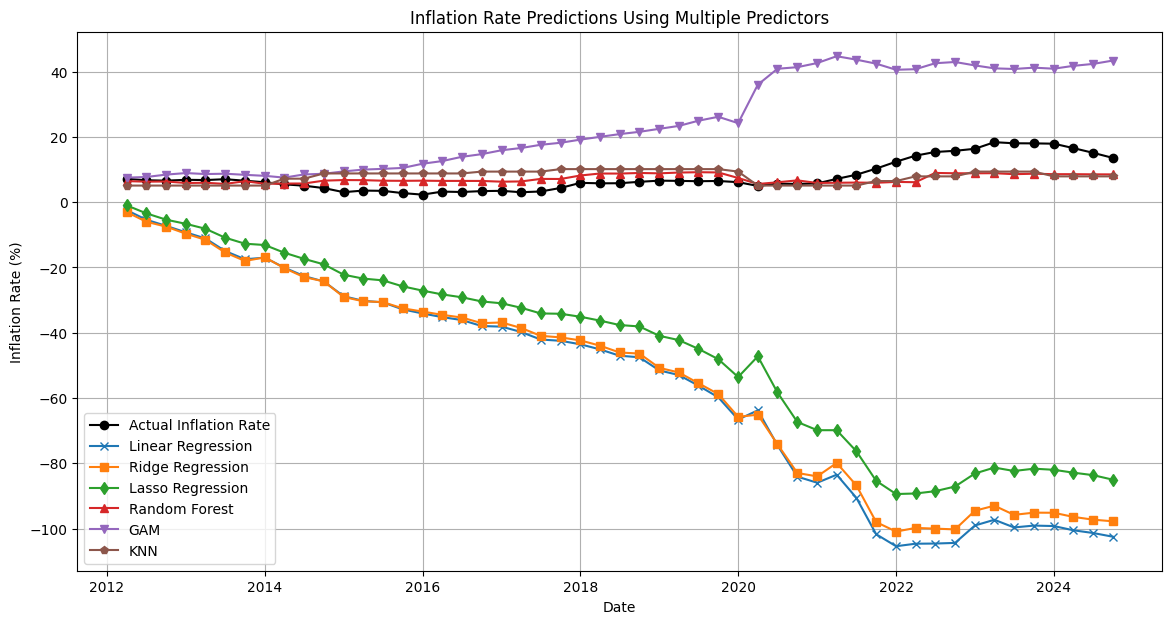

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from operator import add

# Model libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Time series model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# GAM from pygam
# !pip install pygam
from pygam import LinearGAM, s

# ---------------------------
# 1. Data Loading and Preprocessing
# ---------------------------
# Load the CSV data (update the file path as needed)
df = pd.read_csv("/content/fredupdated.csv", parse_dates=['observation_date'])
df = df.sort_values("observation_date")

# Use data from 1959 onward for more reliable measurements
df = df[df['observation_date'] >= '1959-01-01'].copy()

# Calculate Inflation Rate as year-over-year percentage change in CPIAUCSL.
# Set fill_method=None to avoid deprecation warnings.
df['Inflation_Rate'] = df['CPIAUCSL'].pct_change(periods=12, fill_method=None) * 100

# Drop rows with missing Inflation_Rate values
df.dropna(subset=['Inflation_Rate'], inplace=True)

# ---------------------------
# 2. Predictor Selection and Cleaning
# ---------------------------
# Use all columns except date, CPIAUCSL, and target as predictors
predictor_cols = [col for col in df.columns if col not in ['observation_date', 'CPIAUCSL', 'Inflation_Rate']]

# Report missing values per predictor
na_counts = df[predictor_cols].isna().sum()
print("Missing values in predictors:\n", na_counts)

# Identify and drop the predictor with the most missing values
drop_col = na_counts.idxmax()
print("Dropping predictor with most missing values:", drop_col)
predictor_cols.remove(drop_col)

# Drop any rows with NA in any of the remaining predictors
df = df.dropna(subset=predictor_cols)

# Optionally, remove extreme inflation values (e.g., outside -50% to 50%)
df = df[(df['Inflation_Rate'] < 50) & (df['Inflation_Rate'] > -50)].copy()

# ---------------------------
# 3. Define X and y and Create Chronological Train/Test Split
# ---------------------------
X = df[predictor_cols]
y = df['Inflation_Rate']
dates = df['observation_date']

# Chronological split: first 80% for training, last 20% for testing
split_index = int(0.8 * len(df))
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]
X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]
dates_train = dates.iloc[:split_index]
dates_test = dates.iloc[split_index:]

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# ---------------------------
# 4. Model 1: Linear Regression
# ---------------------------
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)
print("\nLinear Regression Results:")
print("RMSE: {:.2f}".format(rmse_lin))
print("R² Score: {:.3f}".format(r2_lin))

# ---------------------------
# 5. Model 2: Ridge Regression
# ---------------------------
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge Regression Results:")
print("Best alpha:", ridge_cv.best_params_['alpha'])
print("RMSE: {:.2f}".format(rmse_ridge))
print("R² Score: {:.3f}".format(r2_ridge))

# ---------------------------
# 6. Model 3: Lasso Regression
# ---------------------------
lasso = Lasso(max_iter=10000)
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print("\nLasso Regression Results:")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("RMSE: {:.2f}".format(rmse_lasso))
print("R² Score: {:.3f}".format(r2_lasso))

# ---------------------------
# 7. Model 4: Random Forest Regression
# ---------------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regression Results:")
print("RMSE: {:.2f}".format(rmse_rf))
print("R² Score: {:.3f}".format(r2_rf))

# ---------------------------
# 8. Model 5: Generalized Additive Model (GAM)
# ---------------------------
# Build a GAM with a spline term for each predictor.
# Use reduce with operator.add to combine terms.
n_features = X_train.shape[1]
gam_terms = reduce(add, [s(i) for i in range(n_features)])
gam = LinearGAM(gam_terms).fit(X_train.values, y_train)
y_pred_gam = gam.predict(X_test.values)
rmse_gam = np.sqrt(mean_squared_error(y_test, y_pred_gam))
r2_gam = r2_score(y_test, y_pred_gam)
print("\nGAM Regression Results:")
print("RMSE: {:.2f}".format(rmse_gam))
print("R² Score: {:.3f}".format(r2_gam))

# ---------------------------
# 9. Model 6: k-Nearest Neighbors Regression
# ---------------------------
# Scale predictors for KNN (distance-based algorithm)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor()
param_grid = {'n_neighbors': range(3, 21, 2)}
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
knn_cv.fit(X_train_scaled, y_train)
best_k = knn_cv.best_params_['n_neighbors']
best_knn = knn_cv.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
print("\nKNN Regression Results:")
print("Best k:", best_k)
print("RMSE: {:.2f}".format(rmse_knn))
print("R² Score: {:.3f}".format(r2_knn))

# ---------------------------
# 10. Plotting Predictions vs. Actual Values
# ---------------------------
plt.figure(figsize=(14,7))
plt.plot(dates_test, y_test, label="Actual Inflation Rate", marker="o", color="black")
plt.plot(dates_test, y_pred_lin, label="Linear Regression", marker="x")
plt.plot(dates_test, y_pred_ridge, label="Ridge Regression", marker="s")
plt.plot(dates_test, y_pred_lasso, label="Lasso Regression", marker="d")
plt.plot(dates_test, y_pred_rf, label="Random Forest", marker="^")
plt.plot(dates_test, y_pred_gam, label="GAM", marker="v")
plt.plot(dates_test, y_pred_knn, label="KNN", marker="p")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.title("Inflation Rate Predictions Using Multiple Predictors")
plt.legend()
plt.grid(True)
plt.show()